<a href="https://colab.research.google.com/github/BanhNg2005/BanhNg2005/blob/main/EN_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv('50_Startups.csv')
# print(dataset)

# dataset.loc[49, 'R&D Spend'] = 100000
dataset.loc[49, 'R&D Spend'] = round(dataset['R&D Spend'].mean(), 2)
# print(dataset)
for x in dataset.index:
    if dataset.loc[x, 'Marketing Spend'] < 10000:
        dataset.loc[x, 'Marketing Spend'] = round(dataset['Marketing Spend'].mean(), 2)
dataset = dataset.drop(47)
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [34]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
# print(x)
# print(y)

In [35]:
states = pd.get_dummies(X['State'], drop_first=True)
# print(states)

X = pd.concat([X, states], axis = 1)
X = X.drop('State', axis = 1)
print(X.head())

   R&D Spend  Administration  Marketing Spend  Florida  New York
0  165349.20       136897.80        471784.10    False      True
1  162597.70       151377.59        443898.53    False     False
2  153441.51       101145.55        407934.54     True     False
3  144372.41       118671.85        383199.62    False      True
4  142107.34        91391.77        366168.42     True     False


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [38]:
Y_pred = model.predict(X_test)
# print(Y_pred)
# print(Y_test)

print(model.predict([[300000, 100000, 200000, 0, 1]]))

[263688.23354372]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print(score)

0.9390552566694372


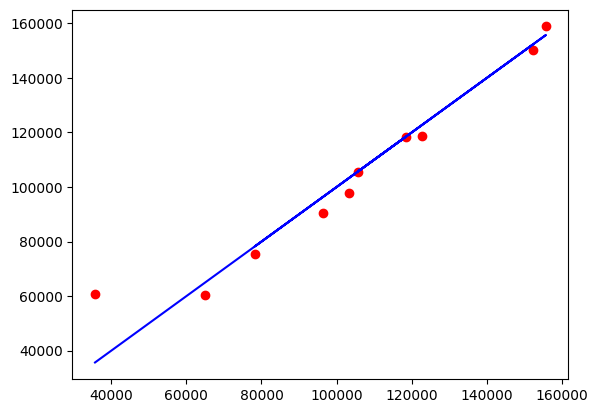

In [40]:
plt.scatter(Y_test, Y_pred, color = 'red')
plt.plot(Y_test, Y_test, color = 'blue')